In [ ]:
import keras
from keras.datasets import cifar10
import pandas as pd

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def drawImg(img):
  plt.imshow(img.reshape(32,32,3))
  plt.show()

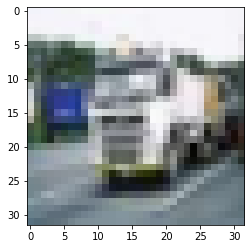

In [ ]:
drawImg(X_train[1000])

In [ ]:
y_train[450]

array([5], dtype=uint8)

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

# CNN 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from keras.utils import to_categorical

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3) ,activation='relu', input_shape=(32,32,3)))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

# model.add(Conv2D(filters=64, kernel_size=(3,3) ,activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0

In [ ]:
y_test = to_categorical(y_test)
y_train  = to_categorical(y_train)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1, 32,32, 3)

In [ ]:
# datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.1,rotation_range=30, 
#                          width_shift_range=0.25,
#                          height_shift_range=0.25,
#                          shear_range=0.2,
#                          zoom_range=0.3,
#                          horizontal_flip=True, )

In [ ]:
# training_generator = datagen.flow(X_train, y_train, batch_size=32,subset='training',seed=42)
# validation_generator = datagen.flow(X_train, y_train, batch_size=32,subset='validation',seed=42)

In [ ]:
# X_test=X_test/255.

In [ ]:
# h= model.fit(
#     training_generator,
#     steps_per_epoch=(len(X_train)*0.8)//32, 
#     epochs=10, 
#     validation_data=validation_generator, 
#     validation_steps=(len(X_train)*0.2)//32)

In [ ]:
# model.evaluate(X_test, y_test)

## <--------------->

In [ ]:
hist = model.fit(X_train, y_train, batch_size=64, epochs = 50, validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3883 - accuracy: 0.8790 - val_loss: 1.0051 - val_accuracy: 0.7383
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3825 - accuracy: 0.8806 - val_loss: 1.0565 - val_accuracy: 0.7244
Epoch 3/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3671 - accuracy: 0.8847 - val_loss: 1.0347 - val_accuracy: 0.7345
Epoch 4/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3586 - accuracy: 0.8865 - val_loss: 1.0062 - val_accuracy: 0.7363
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3697 - accuracy: 0.8831 - val_loss: 1.0416 - val_accuracy: 0.7378
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3566 - accuracy: 0.8889 - val_loss: 1.0469 - val_accuracy: 0.7339
Epoch 7/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3592 - accuracy: 0.8880 - val_loss: 1.0388 - val_accuracy: 0.7339
Epoch 

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 1.1653 - accuracy: 0.7353


[1.1653273105621338, 0.7353000044822693]

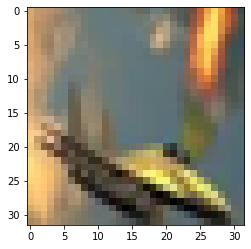

In [ ]:
drawImg(X_test[125])

In [ ]:
np.argmax(model.predict_classes(X_test[125].reshape(1,32,32,3))[0])

0

In [ ]:
y_test[6].argmax()

1

In [ ]:
pred = []
for i in range(X_test.shape[0]):
  k = model.predict_classes(X_test[i].reshape(1,32,32,3))[0]
  pred.append(k)